Electromagnetic contribution to CSV in PDF 
https://arxiv.org/pdf/1512.04139.pdf

In [50]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad,dblquad
from scipy import integrate

In [51]:
#Quark distribution functions by GRV
#Delta = db-ub,T = ub+db
#x = np.linspace(0.2,0.7,50)
x = np.arange(0.01,0.99,0.01)
xuv_LO = 1.239*x**0.48*(1-x)**2.72
xdv_LO = 0.614*(1-x)**0.9*xuv_LO
xDelta_LO = 0.23*x**0.48*(1-x)**11.3*(1-12*x**0.5+50.9*x)
xT_LO = 1.52*x**0.15*(1-x)**9.1*(1-3.6*x**0.5+7.8*x)
xg_LO = 17.47*x**1.6*(1-x)**3.8
#xs_LO = xsb_LO = 0
#the corresponding NLO input at Q2 = 0.4
xuv_NLO = 0.632*x**0.43*(1-x)**3.09*(1+18.2*x)
xdv_NLO = 0.624*(1-x)**1*xuv_NLO
xDelta_NLO = 0.2*x**0.43*(1-x)**12.4*(1-13.3*x**0.5+60.0*x)
xT_NLO = 1.24*x**0.2*(1-x)**8.5*(1-2.3*x**0.5+5.7*x)
xg_NLO = 20.80*x**1.6*(1-x)**4.1
#xs_NLO = xsb_NLO = 0

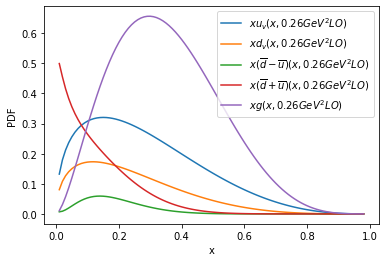

In [52]:
plt.plot(x,xuv_LO,label = r'$xu_v(x,0.26 GeV^2LO)$')
plt.plot(x,xdv_LO,label = r'$xd_v(x,0.26 GeV^2LO)$')
plt.plot(x,xDelta_LO,label = r'$x(\overline{d}-\overline{u})(x,0.26 GeV^2LO)$')
plt.plot(x,xT_LO,label = r'$x(\overline{d}+\overline{u})(x,0.26 GeV^2LO)$')
plt.plot(x,xg_LO,label = r'$xg(x,0.26 GeV^2LO)$')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

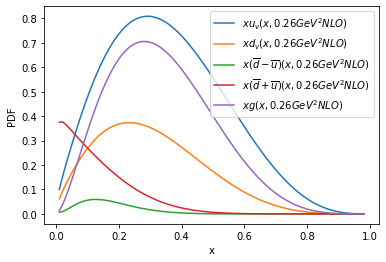

In [53]:
plt.plot(x,xuv_NLO,label = r'$xu_v(x,0.26 GeV^2NLO)$')
plt.plot(x,xdv_NLO,label = r'$xd_v(x,0.26 GeV^2NLO)$')
plt.plot(x,xDelta_NLO,label = r'$x(\overline{d}-\overline{u})(x,0.26 GeV^2NLO)$')
plt.plot(x,xT_NLO,label = r'$x(\overline{d}+\overline{u})(x,0.26 GeV^2NLO)$')
plt.plot(x,xg_NLO,label = r'$xg(x,0.26 GeV^2NLO)$')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()

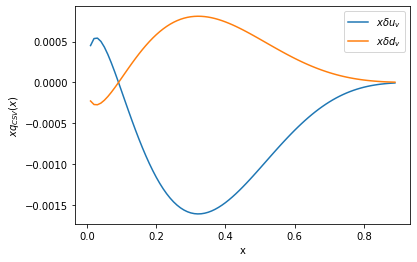

In [54]:
def delta_udv(parameter):
    x = np.arange(0.01,0.9,0.01)
    return x*parameter*(1-x)**4*x**-0.5*(x-0.0909)

x_axis = np.arange(0.01,0.9,0.01)
y_delta_uv = delta_udv(-0.058)
plt.plot(x_axis,y_delta_uv,label=r'$x\delta u_v$')
y_delta_dv = delta_udv(0.0292)
plt.plot(x_axis,y_delta_dv,label=r'$x\delta d_v$')

plt.xlabel("x")
plt.ylabel(r'$xq_{CSV}(x)$')
plt.legend()

In [66]:
#radiative QED effects, DGLAP evolution
Q2 = 0.26
def integrand(t,x):
    mp = 0.938
    GE = 1/(1+Q2/0.71)**2
    GM = GE*2.793
    F1 = (4*mp**2*GE+Q2*GM)/(Q2+4*mp**2)
    alpha = 1/137
    formula = (x-1)*((x-1)*t-x**2*mp**2)/(t**2*(x-1)**2)*F1**2
    coefficient = alpha/(2*math.pi)*(1+(1-x)**2)/x
    return x*coefficient*formula



I = integrate.nquad(integrand,[[0,Q2],[0,1]])
print(I)

(37807842.36761933, 49636229043.58511)
